## Data and the Purpose of the Project ##

### By Saleem Younus & Sakeena Younus ###

**Dataset Name:** All Space Missions from 1957 

https://www.kaggle.com/datasets/agirlcoding/all-space-missions-from-1957

This dataset contains data on every space mission since 1957 during the space race including but not limited to the company, location, date & time, and status of the mission. We are planning to  

**Analyze:**
* Number of missions overtime
* Amount of missions per country
* Success vs Failure per country
* Prediction results when normalized vs. not normalized

**Predict:**
* Success, partial failure, prelaunch failure, and failure using RFDT
* Success, partial failure, prelaunch failure, and failure using SVM



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df = 'SpaceMissions.csv'
df = pd.read_csv(df)
df

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


### Cleaning up data ###

**Dropping unnecessary and null-filled columns**

In [ ]:
df.drop('Unnamed: 0.1', axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.info

<bound method DataFrame.info of      Company Name                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                           Datum  \
0     Fri Aug 07, 2020 05:12 UTC   
1     Thu Aug 06, 2020 04:01 UT

In [ ]:
print(df.isnull().sum())

Company Name         0
Location             0
Datum                0
Detail               0
Status Rocket        0
 Rocket           3360
Status Mission       0
dtype: int64


In [ ]:
df.drop(df.columns[5], axis=1, inplace=True) #dropping rocket

In [ ]:
df

,Company Name,Location,Datum,Detail,Status Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,Success
...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,Success


In [ ]:
print(df.isnull().sum())

Company Name      0
Location          0
Datum             0
Detail            0
Status Rocket     0
Status Mission    0
dtype: int64


In [ ]:
# Extract country names from the "Location" column
df['Country'] = df['Location'].apply(lambda x: x.split(',')[-1].strip())

In [ ]:
df

,Company Name,Location,Datum,Detail,Status Rocket,Status Mission,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,Success,USA
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,Failure,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,Success,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,Failure,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,Success,Kazakhstan


In [ ]:
56+22

78

### Data Visualization & Analysis ###

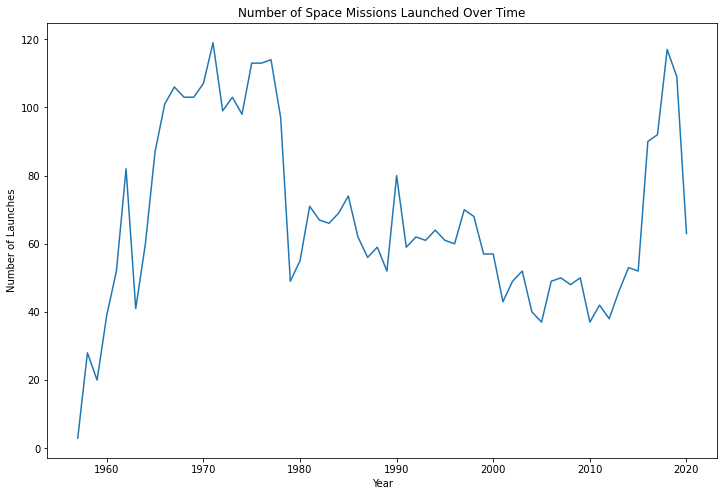

In [ ]:
df['Datum'] = pd.to_datetime(df['Datum'], utc=True)

# Group the data by year and count the number of launches for each year
launches_per_year = df.groupby(df['Datum'].dt.year)['Datum'].count()

# Create a line chart of the number of launches over time
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(launches_per_year.index, launches_per_year.values)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Launches')
ax.set_title('Number of Space Missions Launched Over Time')
plt.show()

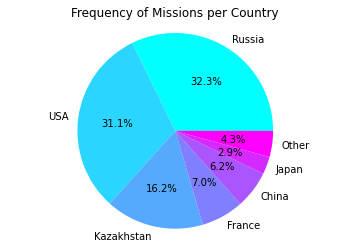

In [ ]:
# count the frequency of each country
country_counts = df['Country'].value_counts()

# calculate the percentage of each country
country_percentages = country_counts / len(df)

# replace countries that appear less than 20% with "Other"
threshold = 0.02
other_percent = country_percentages[country_percentages < threshold].sum()
country_percentages = country_percentages[country_percentages >= threshold]
country_percentages['Other'] = other_percent

cmap = plt.get_cmap('cool')
colors = cmap(np.linspace(0, 1, len(country_percentages)))

# create a pie chart
plt.pie(country_percentages.values, labels=country_percentages.index, colors = colors, autopct='%1.1f%%')
plt.title('Frequency of Missions per Country')
plt.axis('equal')
plt.show()

In [ ]:
len(df['Country'].unique())

22

###### 

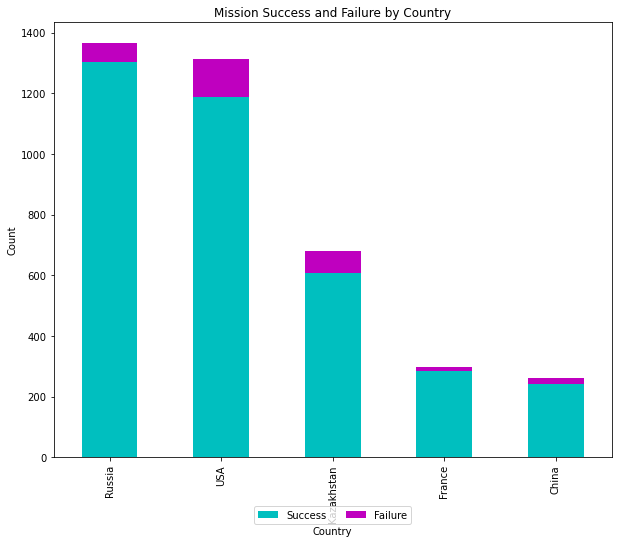

In [ ]:
# group the data by country and mission status
counts = df.groupby(['Country', 'Status Mission'])['Status Mission'].count()

# create a new DataFrame with the counts
new_df = pd.DataFrame(counts).rename(columns={'Status Mission': 'Count'}).reset_index()

# pivot the data to create a stacked bar chart
pivot_df = new_df.pivot(index='Country', columns='Status Mission', values='Count')

# sort the bars by the total number of missions
pivot_df['Total'] = pivot_df['Success'] + pivot_df['Failure']
pivot_df = pivot_df.sort_values('Total', ascending=False)

# select the top 5 countries
top_5 = pivot_df.head(5)

# create a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 8))
top_5[['Success', 'Failure']].plot(kind='bar', stacked=True, ax=ax, color=['c', 'm'])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.title('Mission Success and Failure by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()


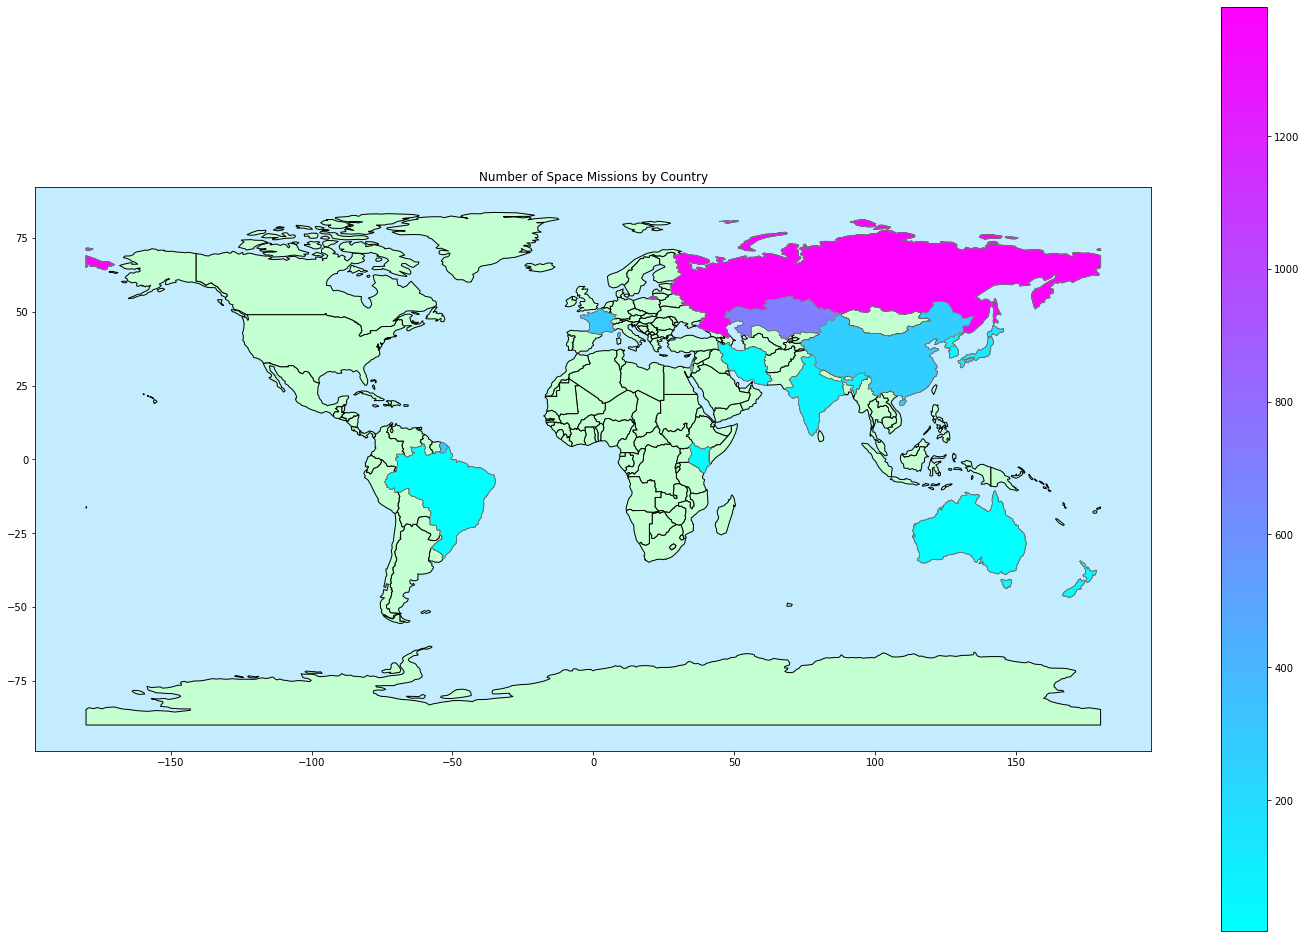

In [49]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world shapefile
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Extract the country from the Location column
df['Country'] = df['Location'].apply(lambda x: x.split(',')[-1].strip())

# Group the data by country and count the number of missions
missions_by_country = df.groupby('Country')['Detail'].count().reset_index(name='Count')

# Merge the world map with the missions data
merged_data = world_map.merge(missions_by_country, left_on='name', right_on='Country')

# Plot the map

ax.set_xlim([-100, 200])
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(25, 17))
ax = world.plot(color='#C3FFD1', edgecolor='black', ax=ax)
ax.set_facecolor('#C3EDFF')

merged_data.plot(column='Count', cmap='cool', linewidth=0.8, edgecolor='gray', ax=ax, legend=True)

# Set the title of the figure
ax.set_title('Number of Space Missions by Country')

plt.show()


### Solving the Problem ###

In [ ]:
# Convert categorical columns to numerical using one-hot encoding
data_encoded = pd.get_dummies(df, columns=['Company Name', 'Country', 'Status Rocket'])

# Drop the columns that are not needed for the model
data_encoded.drop(['Datum', 'Detail', 'Location'], axis=1, inplace=True)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split


In [ ]:
dfa = data_encoded
dfa

,Status Mission,Company Name_AEB,Company Name_AMBA,Company Name_ASI,Company Name_Arianespace,Company Name_Arm??e de l'Air,Company Name_Blue Origin,Company Name_Boeing,Company Name_CASC,Company Name_CASIC,...,Country_North Korea,Country_Pacific Missile Range Facility,Country_Pacific Ocean,Country_Russia,Country_Shahrud Missile Test Site,Country_South Korea,Country_USA,Country_Yellow Sea,Status Rocket_StatusActive,Status Rocket_StatusRetired
0,Success,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,Success,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,Success,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,Success,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Success,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,Failure,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4320,Success,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4321,Failure,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4322,Success,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Split the data into training and testing sets
X = dfa.drop(['Status Mission'], axis=1)
y = dfa['Status Mission']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set and calculate accuracy
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9060092449922958


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cr = classification_report(y_test, y_pred)
print(cr)

                   precision    recall  f1-score   support

          Failure       0.80      0.08      0.15        99
  Partial Failure       1.00      0.03      0.06        30
Prelaunch Failure       0.00      0.00      0.00         1
          Success       0.91      1.00      0.95      1168

         accuracy                           0.91      1298
        macro avg       0.68      0.28      0.29      1298
     weighted avg       0.90      0.91      0.87      1298



/Users/saleem/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saleem/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saleem/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y.unique()

array(['Success', 'Failure', 'Prelaunch Failure', 'Partial Failure'],
      dtype=object)

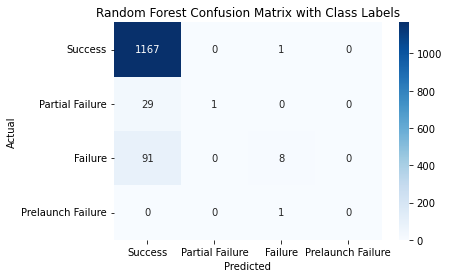

In [ ]:
labels = list(set(y_test))
cm = confusion_matrix(y_test, y_pred, labels=labels)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix with Class Labels')
plt.show()

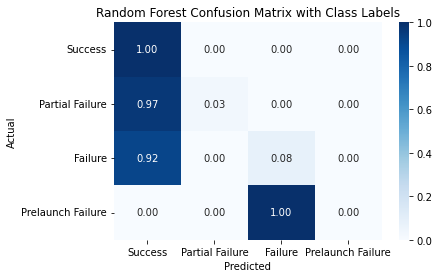

In [ ]:
labels = list(set(y_test))
cm = confusion_matrix(y_test, y_pred, labels=labels, normalize = 'true')
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix with Class Labels')
plt.show()

In [ ]:
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9052388289676425


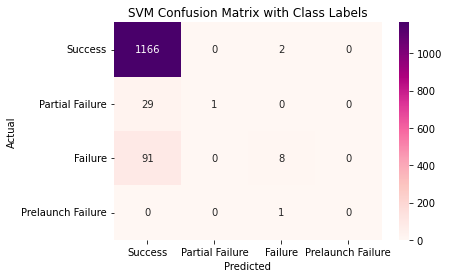

In [ ]:
labels = list(set(y_test))
cm = confusion_matrix(y_test, y_pred, labels=labels)
sns.heatmap(cm, annot=True, cmap='RdPu', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix with Class Labels')
plt.show()

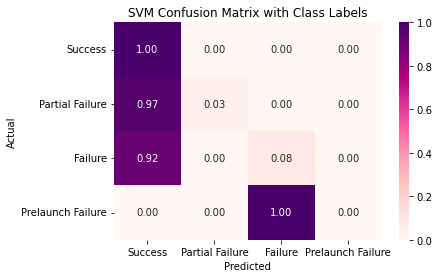

In [ ]:
labels = list(set(y_test))
cm = confusion_matrix(y_test, y_pred, labels=labels, normalize='true')
sns.heatmap(cm, annot=True, cmap='RdPu', fmt='.2f', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix with Class Labels')
plt.show()